# Superstore Analysis

#### Problem Statement

- The Superstore dataset provides sales and profit data for a variety of products across different categories and regions.
- The goal of this project is to analyze the data and identify insights that can help the company improve its business performance. 
- Specifically, we aim to answer questions such as: which product categories are the most profitable? Which regions have the highest sales and profit? What are the most profitable products? 
- By answering these questions, we hope to provide recommendations for the company on how to optimize its product offerings and improve its revenue and profitability.


### Assumptions

- The superstore dataset contains a representative sample of all transactions conducted by the store during the time period covered by the dataset.
- The data in the superstore dataset is accurate and has been cleaned and preprocessed prior to analysis.
- The superstore dataset covers a sufficient time period to allow for the identification of trends or patterns in sales and profitability.
- The Super Store dataset is not impacted by any significant outliers or anomalies that could skew the results of any analysis conducted on the dataset.

### Research Question

- Which product categories have the highest profit margins in the Super Store?
- Are there any significant differences in sales between the East region and other regions?
- How do sales vary by product category during different months of the year?
- What is the rate of returned products for orders with same-day shipping compared to other shipping options?
- How do sales and profit vary by product category on weekdays compared to weekends?

# Execution

In [46]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: pandas in c:\users\kamil\appdata\local\packages\pythonsoftwarefoundation.python.3.11_qbz5n2kfra8p0\localcache\local-packages\python311\site-packages (2.1.3)




[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\kamil\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [47]:
pip install matplotlib


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\kamil\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [48]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\kamil\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [50]:
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [51]:
import warnings
warnings.filterwarnings('ignore')

In [52]:
data = pd.read_csv('superstore_dataset2011-2015.csv', encoding = 'ISO-8859-1')
data

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,42433,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,...,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.000,106.140,35.460,Medium
1,22253,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.100,36.036,9.720,Medium
2,48883,HU-2011-1220,1/1/2011,5/1/2011,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,...,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.000,29.640,8.170,High
3,11731,IT-2011-3647632,1/1/2011,5/1/2011,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,...,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.500,-26.055,4.820,High
4,22255,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.100,37.770,4.700,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,32593,CA-2014-115427,31-12-2014,4/1/2015,Standard Class,EB-13975,Erica Bern,Corporate,Fairfield,California,...,OFF-BI-10002103,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.200,4.519,0.890,Medium
51286,47594,MO-2014-2560,31-12-2014,5/1/2015,Standard Class,LP-7095,Liz Preis,Consumer,Agadir,Souss-Massa-Draâ,...,OFF-WIL-10001069,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",3.990,1,0.000,0.420,0.490,Medium
51287,8857,MX-2014-110527,31-12-2014,2/1/2015,Second Class,CM-12190,Charlotte Melton,Consumer,Managua,Managua,...,OFF-LA-10004182,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26.400,3,0.000,12.360,0.350,Medium
51288,6852,MX-2014-114783,31-12-2014,6/1/2015,Standard Class,TD-20995,Tamara Dahlen,Consumer,Juárez,Chihuahua,...,OFF-LA-10000413,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7.120,1,0.000,0.560,0.200,Medium


### Explore the data

#### 1. Display top 5 rows

In [53]:
data.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,42433,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,...,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.000,106.140,35.460,Medium
1,22253,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.100,36.036,9.720,Medium
2,48883,HU-2011-1220,1/1/2011,5/1/2011,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,...,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.000,29.640,8.170,High
3,11731,IT-2011-3647632,1/1/2011,5/1/2011,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,...,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.500,-26.055,4.820,High
4,22255,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.100,37.770,4.700,Medium


In [54]:
data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

#### 2. Display the last 5 rows

In [55]:
data.tail(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
51285,32593,CA-2014-115427,31-12-2014,4/1/2015,Standard Class,EB-13975,Erica Bern,Corporate,Fairfield,California,...,OFF-BI-10002103,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.200,4.519,0.890,Medium
51286,47594,MO-2014-2560,31-12-2014,5/1/2015,Standard Class,LP-7095,Liz Preis,Consumer,Agadir,Souss-Massa-Draâ,...,OFF-WIL-10001069,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",3.990,1,0.000,0.420,0.490,Medium
51287,8857,MX-2014-110527,31-12-2014,2/1/2015,Second Class,CM-12190,Charlotte Melton,Consumer,Managua,Managua,...,OFF-LA-10004182,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26.400,3,0.000,12.360,0.350,Medium
51288,6852,MX-2014-114783,31-12-2014,6/1/2015,Standard Class,TD-20995,Tamara Dahlen,Consumer,Juárez,Chihuahua,...,OFF-LA-10000413,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7.120,1,0.000,0.560,0.200,Medium
51289,36388,CA-2014-156720,31-12-2014,4/1/2015,Standard Class,JM-15580,Jill Matthias,Consumer,Loveland,Colorado,...,OFF-FA-10003472,Office Supplies,Fasteners,Bagged Rubber Bands,3.024,3,0.200,-0.605,0.170,Medium


#### 3. Shape of the dataset

In [56]:
data.shape

(51290, 24)

#### 4. Get information about the data first

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   City            51290 non-null  object 
 9   State           51290 non-null  object 
 10  Country         51290 non-null  object 
 11  Postal Code     9994 non-null   float64
 12  Market          51290 non-null  object 
 13  Region          51290 non-null  object 
 14  Product ID      51290 non-null  object 
 15  Category        51290 non-null  object 
 16  Sub-Category    51290 non-null  object 
 17  Product Name    51290 non-null 

#### 5. Check null values in the dataset

In [58]:
data.isnull().sum()

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64

The postal code has a lot off null values

#### 6. Check the duplicate

In [59]:
data.duplicated().any()

False

no one data duplicated

#### 7. Get the statistic data

In [60]:
data.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
count,51290.000,9994.000,51290.000,51290.000,51290.000,51290.000,51290.000
mean,25645.500,55190.379,246.491,3.477,0.143,28.611,26.376
std,14806.292,32063.693,487.565,2.279,0.212,174.341,57.297
min,1.000,1040.000,0.444,1.000,0.000,-6599.978,0.000
25%,12823.250,23223.000,30.759,2.000,0.000,0.000,2.610
50%,25645.500,56430.500,85.053,3.000,0.000,9.240,7.790
75%,38467.750,90008.000,251.053,5.000,0.200,36.810,24.450
max,51290.000,99301.000,22638.480,14.000,0.850,8399.976,933.570


#### 8. Drop unnecessary columns

In [61]:
data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

In [62]:
data = data.drop(['Row ID', 'Order ID', 'Customer ID', 'Postal Code'], axis=1)

In [63]:
data.columns

Index(['Order Date', 'Ship Date', 'Ship Mode', 'Customer Name', 'Segment',
       'City', 'State', 'Country', 'Market', 'Region', 'Product ID',
       'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity',
       'Discount', 'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

## Research answer

#### 1. Which product categories have the highest profit margins in the Super Store?

In [72]:
data.columns

Index(['Order Date', 'Ship Date', 'Ship Mode', 'Customer Name', 'Segment',
       'City', 'State', 'Country', 'Market', 'Region', 'Product ID',
       'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity',
       'Discount', 'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

In [69]:
profit_by_category = data.groupby('Category')['Profit'].sum()
profit_by_category

Category
Furniture         285204.724
Office Supplies   518473.834
Technology        663778.733
Name: Profit, dtype: float64

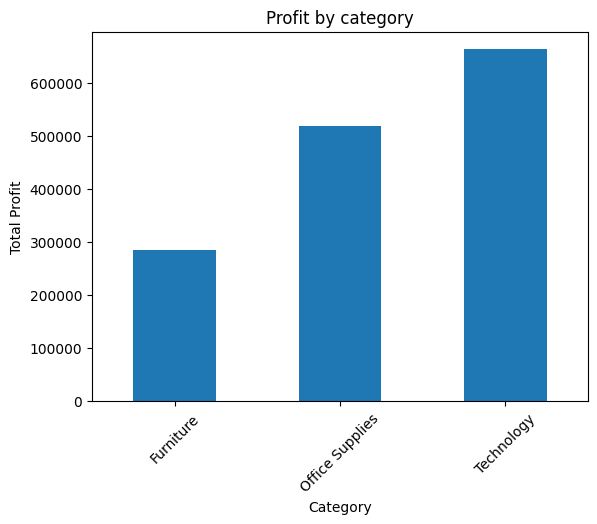

In [78]:
profit_by_category.plot(kind='bar')
plt.title('Profit by category')
plt.xlabel('Category')
plt.xticks( rotation = 45)
plt.ylabel('Total Profit')
plt.show()

So, based on the graphic above, Technology products have the highest profit margin of the three categories.

#### 2. Are there any significant differences in sales between the East region and other regions?

In [73]:
data.columns

Index(['Order Date', 'Ship Date', 'Ship Mode', 'Customer Name', 'Segment',
       'City', 'State', 'Country', 'Market', 'Region', 'Product ID',
       'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity',
       'Discount', 'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

In [75]:
region_sales = data.groupby('Region')['Sales'].sum()
region_sales

Region
Africa            783773.211
Canada             66928.170
Caribbean         324280.861
Central          2822302.520
Central Asia      752826.567
EMEA              806161.311
East              678781.240
North            1248165.603
North Asia        848309.781
Oceania          1100184.612
South            1600907.041
Southeast Asia    884423.169
West              725457.824
Name: Sales, dtype: float64

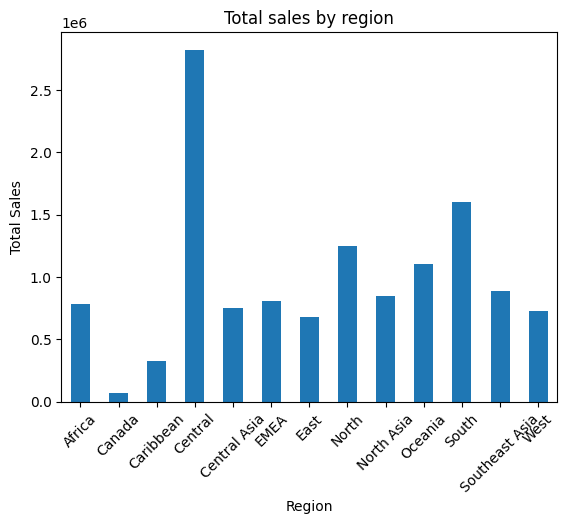

In [79]:
region_sales.plot(kind='bar')
plt.title('Total sales by region')
plt.xlabel('Region')
plt.xticks( rotation = 45)
plt.ylabel('Total Sales')
plt.show()

So, Based on graphic above the Central region has the highest sales

### 3. How do sales vary by product category during different months of the year?

In [80]:
data.columns

Index(['Order Date', 'Ship Date', 'Ship Mode', 'Customer Name', 'Segment',
       'City', 'State', 'Country', 'Market', 'Region', 'Product ID',
       'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity',
       'Discount', 'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

In [83]:
data['Order Month'] = pd.DatetimeIndex(data['Order Date']).month
data['Order Month']

0         1
1         1
2         1
3         1
4         1
         ..
51285    12
51286    12
51287    12
51288    12
51289    12
Name: Order Month, Length: 51290, dtype: int32

In [85]:
month_sales = data.groupby('Order Month')['Sales'].sum()
month_sales

Order Month
1     775766.912
2     722853.169
3     951333.085
4     851617.321
5     976415.681
6    1152367.788
7     838743.556
8    1247500.805
9    1244139.726
10   1120777.468
11   1377651.291
12   1383335.107
Name: Sales, dtype: float64

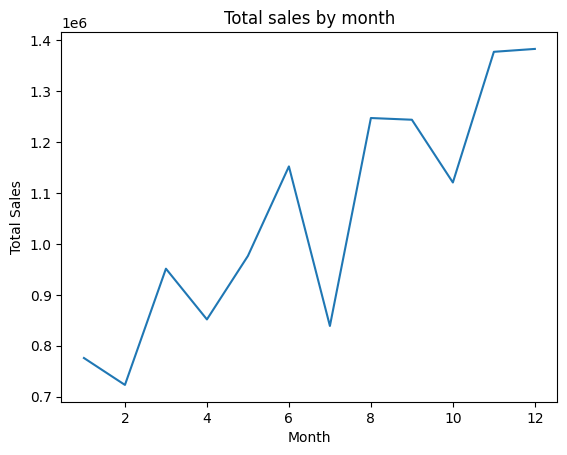

In [86]:
month_sales.plot(kind='line')
plt.title('Total sales by month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

So, Sales are higher in November and December. 

### 4. What is the rate of returned products for orders with same-day shipping compared to other shipping options?

In [87]:
data.columns

Index(['Order Date', 'Ship Date', 'Ship Mode', 'Customer Name', 'Segment',
       'City', 'State', 'Country', 'Market', 'Region', 'Product ID',
       'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity',
       'Discount', 'Profit', 'Shipping Cost', 'Order Priority', 'Order Month'],
      dtype='object')

In [89]:
total_order_byshipping = data.groupby('Ship Mode').size()
total_order_byshipping

Ship Mode
First Class        7505
Same Day           2701
Second Class      10309
Standard Class    30775
dtype: int64

In [90]:
returned_order_byshipping = data[data['Profit'] < 0].groupby('Ship Mode').size()
returned_order_byshipping

Ship Mode
First Class       1882
Same Day           646
Second Class      2482
Standard Class    7534
dtype: int64

In [92]:
returned_per_by_shippingmode = (returned_order_byshipping/total_order_byshipping) * 100
print(returned_per_by_shippingmode)

Ship Mode
First Class      25.077
Same Day         23.917
Second Class     24.076
Standard Class   24.481
dtype: float64


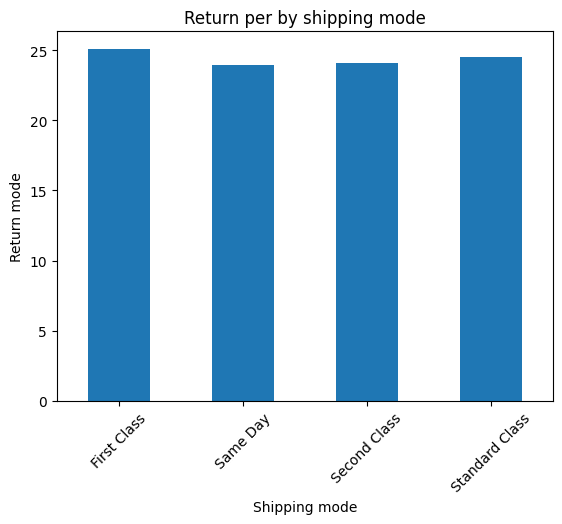

In [94]:
returned_per_by_shippingmode.plot(kind='bar')
plt.title('Return per by shipping mode')
plt.xlabel('Shipping mode')
plt.xticks( rotation = 45)
plt.ylabel('Return mode')
plt.show()

At the time, orders with same-day shipping have the lowest rate of returned products.

### 5. How do sales and profit vary by product category on weekdays compared to weekends?

In [95]:
data.columns

Index(['Order Date', 'Ship Date', 'Ship Mode', 'Customer Name', 'Segment',
       'City', 'State', 'Country', 'Market', 'Region', 'Product ID',
       'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity',
       'Discount', 'Profit', 'Shipping Cost', 'Order Priority', 'Order Month'],
      dtype='object')

In [98]:
data['Order day'] = pd.DatetimeIndex(data['Order Date']).day_name()
data['Order day']

0         Saturday
1         Saturday
2         Saturday
3         Saturday
4         Saturday
           ...    
51285    Wednesday
51286    Wednesday
51287    Wednesday
51288    Wednesday
51289    Wednesday
Name: Order day, Length: 51290, dtype: object

In [100]:
day_profit = data.groupby('Order day')['Profit'].sum()
day_profit

Order day
Friday      243802.835
Monday      246526.557
Saturday    176486.552
Sunday      104117.907
Thursday    241183.080
Tuesday     249788.051
Wednesday   205552.309
Name: Profit, dtype: float64

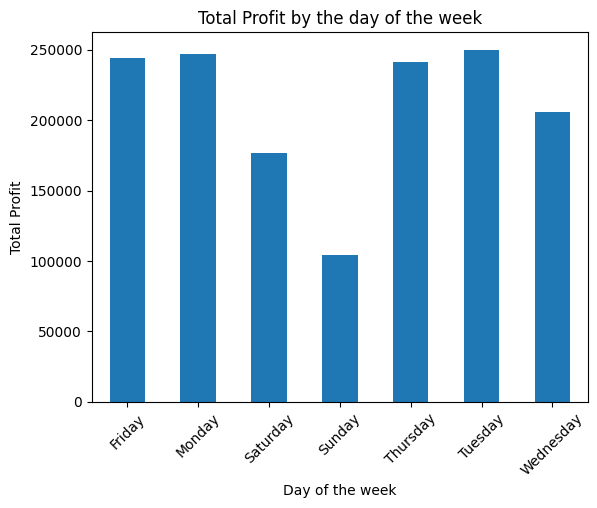

In [102]:
day_profit.plot(kind='bar')
plt.title('Total Profit by the day of the week')
plt.xlabel('Day of the week')
plt.xticks(rotation = 45)
plt.ylabel('Total Profit')
plt.show()

Yes, the company's profit is higher on weekdays compared to weekends.

## The Result

 1. The analysis indicates that technology products exhibit the most substantial profit margins when contrasted with other product categories. 
 2. Weekday profits surpass those on weekends, and specific months experience heightened sales activity. 
 3.  Orders with same-day shipping demonstrate the lowest product return rates, while the data does not substantiate the hypothesis that the East region outperforms others in sales.
 4. These findings offer valuable insights into the company's performance, serving as a foundation for informed decision-making.
 5. It's crucial to acknowledge that additional investigation may be necessary to comprehensively grasp the factors influencing these observed patterns.

## Suggestions

- To enhance profitability, the company should prioritize the development and promotion of technology products while contemplating a reduction in the production and marketing efforts for products with lower profit margins.
- With the Central region leading in sales compared to other areas, a strategic shift to intensify focus on this region is advisable. Concurrently, the company should reassess its marketing and sales strategies in other regions.
- Emphasizing sales optimization during November and December is recommended, involving strategies like increasing popular product inventory, launching targeted marketing initiatives, and offering promotions. Nevertheless, a sustained effort to bolster sales in other months is vital, possibly through the introduction of new products or services and targeted promotions in slower periods.
- The implementation of additional same-day shipping options should be considered, requiring optimization of inventory and supply chain processes for swift and efficient product delivery.
- Exploring diverse promotional strategies during weekends to boost sales is prudent. This could involve exclusive weekend promotions, targeted marketing campaigns for weekend shoppers, or the introduction of special in-store events and activities to attract customers. Additionally, tailoring products and services to preferences popular among weekend shoppers, such as home entertainment or outdoor products, could further enhance sales.